 ## import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



## Dataset Load 

In [4]:
# Load Dataset
df = pd.read_csv("salary_prediction.csv")  
print(df.head())  
print(df.info())


   YearsExperience Education Level              Job Role     Salary
0            14.98             PhD  Marketing Specialist   77861.24
1            38.03             PhD     Software Engineer  166880.38
2            29.28      Bachelor's      Business Analyst  123573.27
3            23.95        Master's  Marketing Specialist   90155.08
4             6.24        Master's      Business Analyst   55931.41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   YearsExperience  100000 non-null  float64
 1   Education Level  100000 non-null  object 
 2   Job Role         100000 non-null  object 
 3   Salary           100000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.1+ MB
None


## Data Preprocessing

In [5]:
# Check missing values
print(df.isnull().sum())  

# Features (X) and Target (y)
X = df[['YearsExperience']]  # Independent Variable
y = df['Salary']  # Dependent Variable

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


YearsExperience    0
Education Level    0
Job Role           0
Salary             0
dtype: int64
Training Data: (80000, 1), Testing Data: (20000, 1)


##  Bagging Regressor

In [6]:
# Initialize Base Model (Decision Tree)
base_model = DecisionTreeRegressor()

# Bagging Model with 10 Decision Trees
bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)

# Train Model
bagging_model.fit(X_train, y_train)

print(" Model Training Complete!")


 Model Training Complete!


## Model Evaluation


In [7]:
# Predict on Test Data
y_pred = bagging_model.predict(X_test)

# Model Performance Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R-Squared Score: {r2:.2f}")


 Mean Squared Error (MSE): 56680548.20
 R-Squared Score: 0.96


## Salary Prediction for New Experience

In [8]:
# Predict Salary for 5 Years of Experience
new_experience = np.array([[5]]) 
predicted_salary = bagging_model.predict(new_experience)

print(f" Predicted Salary for 5 years experience: ₹{predicted_salary[0]:.2f}")


 Predicted Salary for 5 years experience: ₹44185.07


c:\Users\shubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


## Data Visualization

c:\Users\shubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


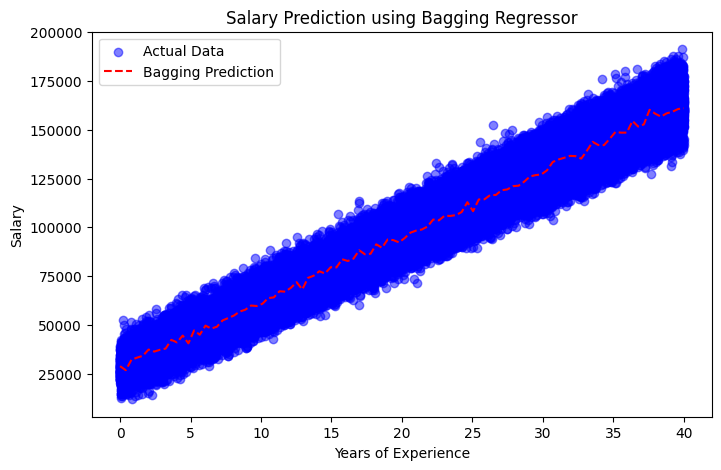

In [9]:
# Scatter Plot of Actual vs Predicted Salaries
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label="Actual Data", alpha=0.5)

# Model Predictions
X_range = np.linspace(min(X.values), max(X.values), 100).reshape(-1, 1)
y_range_pred = bagging_model.predict(X_range)

plt.plot(X_range, y_range_pred, color='red', linestyle="dashed", label="Bagging Prediction")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction using Bagging Regressor")
plt.legend()
plt.show()
